In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
salary_data=pd.read_csv("Position_Salaries.csv")

In [4]:
salary_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
#splitting the data to features and labels
features=salary_data.iloc[:,1:-1].values
labels=salary_data.iloc[:,2].values

In [6]:
print(features)
print(labels)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


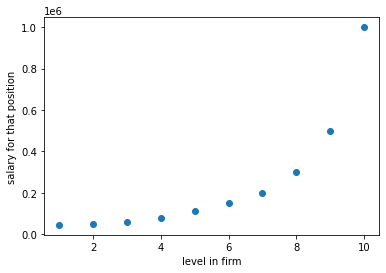

In [7]:
plt.scatter(features,labels)
plt.xlabel("level in firm")
plt.ylabel("salary for that position")
plt.show()

# simple linear regression

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()
lr.fit(features, labels)

LinearRegression()

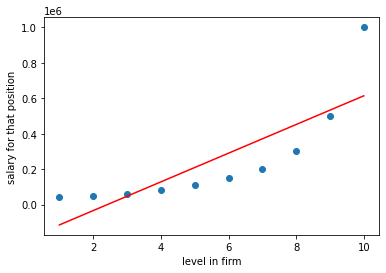

In [11]:
plt.scatter(features,labels)
plt.plot(features, lr.predict(features),c='r')
plt.xlabel("level in firm")
plt.ylabel("salary for that position")
plt.show()

In [13]:
print("R^2 score for Linear Regression on this dataset:",lr.score(features,labels))

R^2 score for Linear Regression on this dataset: 0.6690412331929895


In [14]:
# to handle this we need polynomial regression

from sklearn.preprocessing import PolynomialFeatures

In [15]:
polynomial_reg=PolynomialFeatures(degree=3)

In [16]:
polynomial_features=polynomial_reg.fit_transform(features)

In [17]:
polynomial_features

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [18]:
polynomial_reg.fit(polynomial_features,labels)

PolynomialFeatures(degree=3)

In [21]:
poly_reg_new=LinearRegression()
poly_reg_new.fit(polynomial_features,labels)

LinearRegression()

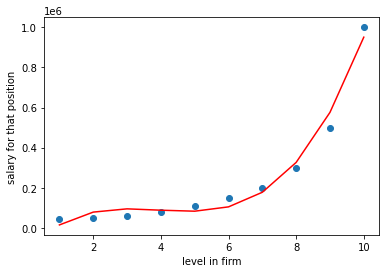

In [22]:
plt.scatter(features,labels)
plt.plot(features,poly_reg_new.predict(polynomial_features),c='r')
plt.xlabel("level in firm")
plt.ylabel("salary for that position")
plt.show()

In [23]:
print("R^2 score for Linear Regression on this dataset:",poly_reg_new.score(polynomial_features,labels))

R^2 score for Linear Regression on this dataset: 0.9812097727913367


we improved R^2 score from 67% simple linear regression to 98% polynomial regression